# Formazione di Runoff superficiale (Horton)

La definizione della condizione al contorno della superficie è in quanto dipende dal sistema: il tasso di infiltrazione attraverso la superficie del suolo dipende dalle precipitazioni, dalla loro intensità e dalle condizioni di umidità del suolo. Per questo motivo, la condizione al contorno della superficie può cambiare da Dirichlet (condizione idrostatica) a Neumann (flusso prescritto). 

Il fenomeno di ruscellamento superficiale (deflussso Hortoniano) si verifica nel caso sia presente una maggiore intensità di precipitazione rispetto alla capacità di infiltrazione del suolo:


$$J > \big|-K(\psi)\dfrac{\partial \psi}{\partial z} - K(\psi)\big|\Big|_{\eta=0} $$

Bisogna aggiornare la griglia, aggiungere un altro volume di controllo per vedere quanta acqua si accumula in superficie.

Facciamo inizialmente la trattazione con valori caratterizzanti un suolo secco: la suzione cambia da -2 a 0 nei 2m di suolo che stiamo prendendo in considerazione

In [19]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')
from geoframepy.timeseries import io_csv

project_path = os.path.dirname(os.getcwd())

In [2]:
grid_input_file_name = project_path + "/data/Grid_input/Runoff_grid.csv"
ic_input_file_name = project_path + "/data/Grid_input/Runoff_ic_dry.csv"
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
grid_type = 'classical'
dz_min = 0.01
dz_max = 0.05
b = 0.5
psi_interp_model = "linear"
T_interp_model = "linear"

water_ponding_0 = -2.0
T_water_ponding_0 = 273.15
output_file_name =  project_path + "/data/Grid_NetCDF/Ric3.nc"

output_title = '''
'''
output_summary = '''


'''

output_date = ''

output_institution = 'GEOframe'

Nel suolo vale l'equazione di Richards, inoltre possiamo accumulare acqua in superficie

In [20]:
output_file_name =  project_path + "/data/Grid_NetCDF/Ric3.nc"
output_title = '''Griglia per la risoluzione dell'equazione di Richards.
                  '''
output_date = ''

output_summary = ''' 

Type,eta,K,equationStateID,parameterID
L,0,400,0,1
L,-0.3,400,0,10
L,-2,0,nan,nan

eta,Psi0,T0
0,-115,273.15
-0.3,-110,273.15
-2,-100,273.15

'''


output_institution = 'GEOframe'

In [4]:
data_grid = pd.read_csv(grid_input_file_name)

data_ic = pd.read_csv(ic_input_file_name)

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\titab\Desktop\Test_GEOframe_verona\OMS_Project_WHETGEO1D_Idrologia_ay_21_22/data/Grid_NetCDF/Ric3.nc


In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
from geoframepy.timeseries import io_csv
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

In [6]:
os.chdir(project_path+'/output')
ds = xr.open_dataset("Ric4_0000.nc")
ds

<xarray.Dataset>
Dimensions:           (depth: 801, dualDepth: 801, time: 288)
Coordinates:
  * depth             (depth) float64 -1.998 -1.994 -1.989 ... -0.000375 0.0
  * dualDepth         (dualDepth) float64 -2.0 -1.996 -1.992 ... -0.00075 0.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-01T23:55:00
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 wet initial condition.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\titab\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\titab\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\titab\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

In [7]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/ex03_rainfall.csv',datetime_index=True)
rain.head()

,0
Datetime,
2020-01-01 00:00:00,0.0
2020-01-01 00:05:00,0.0
2020-01-01 00:10:00,0.0
2020-01-01 00:15:00,0.0
2020-01-01 00:20:00,0.0


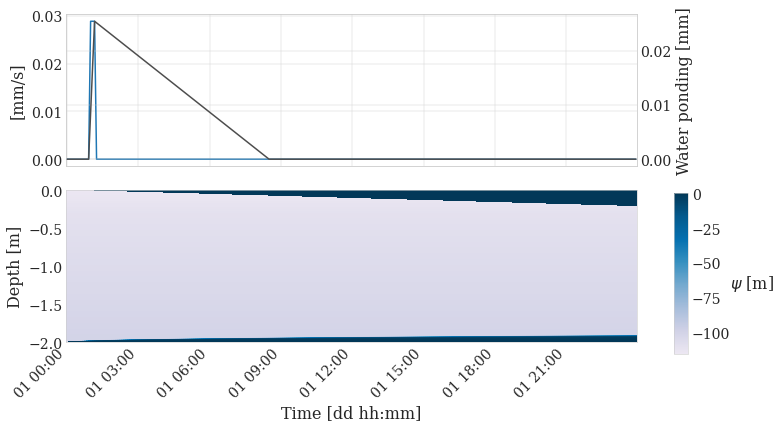

In [9]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'][0:288]/300)
ax[0].set_ylabel('[mm/s]')

ax1=ax[0].twinx()
ds.waterVolume.sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.3')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

#già abbiamo la suzione. sopra abbiamo in azzurro l'intensità di pioggia, in mm/s mentre i nero il volume d'acqua che abbiamo in superficie
# quando inizia a piovere l'acqua inizia ad accumularsi in superficie = inizialmente si infiltra e poi la gran parte del volume di pioggia tende ad accumularsi in superficie
#quando la pioggia finisce il volume d'acqua raggiunge il massimo e poi man mano decresce
# in questo caso quello che assegnameno è il valore della suzione, lo assegnamo a priori

# Formazione di Runoff
## Per saturazione dal basso

L'acqua non riesce a infiltrare perchè il suolo è già completamente saturo.

In [11]:
ds = xr.open_dataset(project_path + '/output/Ric5_0000.nc')
ds

<xarray.Dataset>
Dimensions:           (depth: 801, dualDepth: 801, time: 865)
Coordinates:
  * depth             (depth) float64 -1.998 -1.994 -1.989 ... -0.000375 0.0
  * dualDepth         (dualDepth) float64 -2.0 -1.996 -1.992 ... -0.00075 0.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-04
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex04.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\titab\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\titab\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\titab\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

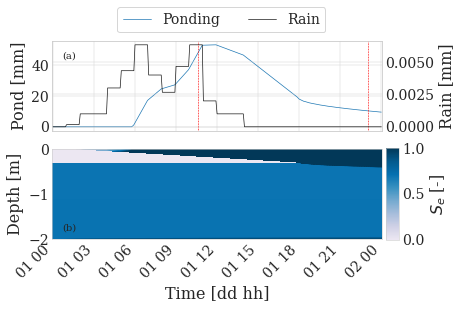

In [15]:
line_w = 0.7

start_date = '2020-01-01 00:00'
end_date = '2020-01-02 00:00'

plot_width = 15/2.54

fig, ax = plt.subplots(2, 1, sharex='col', gridspec_kw={'height_ratios': [1,1]},figsize=(plot_width,plot_width/1.618))

lns1 = ax[0].plot(ds.time.sel(time=slice(start_date, end_date)).values, ds.waterVolume.sel(depth=0).sel(time=slice(start_date,end_date))*1000, label='Ponding', color='#1f78b4', linewidth=line_w)

ax0twin = ax[0].twinx()
lns2 = ax0twin.plot(ds.time.sel(time=slice(start_date, end_date)).values, ds.topBC.sel(time=slice(start_date,end_date))/300, label='Rain', linewidth=line_w, color='0.1')

ax0twin.set_ylabel('Rain [mm]')
ax[0].set_ylabel('Pond [mm]')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax[0].legend(lns, labs, bbox_to_anchor=(0.85,1.45) , ncol=2)


norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
im = ds.saturationDegree.where(ds.depth<0.0).sel(time=slice(start_date, end_date)).plot(ax=ax[1], y='depth', add_colorbar=False, cmap=my_cmap, norm=norm)
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh]')

cbaxes = fig.add_axes([0.91, 0.122, 0.03, 0.35]) 
cbar = fig.colorbar(im, ax=ax[1],orientation="vertical",fraction=0.07, pad=0.1, cax=cbaxes, label='$S_e$ [-]')

ax[0].axvline(x=ds.time.sel(time='2020-01-01 10:35').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')
ax[0].axvline(x=ds.time.sel(time='2020-01-01 23:00').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')

ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
ax[1].xaxis.set_tick_params(rotation=45)

plt.text( 0.03,0.8, '(a)', fontsize=10,
             transform=ax[0].transAxes)
plt.text( 0.03,0.1, '(b)', fontsize=10,
             transform=ax[1].transAxes)


plt.show()

Nei primi istanti di precipitazione l'acqua si infiltra. L'acqua tende a infiltrare sotto. anche quando la pioggia cessa di persistere il volume d'acqua si infiltra.

Il fronte di saturazione si muove sia verso il basso che verso l'alto, fin tanto che il layer sopra non diventa completamente saturo

Aumentando la profondità del Layer superficiale notiamo che il fronte propaga sempre verso il basso, non si ha accumulo di acqua in superficie e dopodichè il fronte impiega più tempo a raggiungere il layer sottostante.

Per la produzione di Runoff superficiale conta più che altro la profondità dello strato sopra. se lo strato ha una capacità di immagazzinamento piccola è più facile che si abbia accumulo di acqua in superficie.